In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("SalaryData_Train(1).csv")

In [3]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data=data.drop(['education','educationno','maritalstatus','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native'],axis=1)

In [5]:
data.head(11)

,age,workclass,occupation,Salary
0,39,State-gov,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Exec-managerial,<=50K
2,38,Private,Handlers-cleaners,<=50K
3,53,Private,Handlers-cleaners,<=50K
4,28,Private,Prof-specialty,<=50K
5,37,Private,Exec-managerial,<=50K
6,49,Private,Other-service,<=50K
7,52,Self-emp-not-inc,Exec-managerial,>50K
8,31,Private,Prof-specialty,>50K
9,42,Private,Exec-managerial,>50K


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['workclass']= label_encoder.fit_transform(data['workclass'])
data['occupation']= label_encoder.fit_transform(data['occupation'])
data['Salary']= label_encoder.fit_transform(data['Salary'])

In [7]:
data.head(11)

,age,workclass,occupation,Salary
0,39,5,0,0
1,50,4,3,0
2,38,2,5,0
3,53,2,5,0
4,28,2,9,0
5,37,2,3,0
6,49,2,7,0
7,52,4,3,1
8,31,2,9,1
9,42,2,3,1


In [8]:
data[data.duplicated()].shape

(26138, 4)

In [9]:
data[data.duplicated()]

,age,workclass,occupation,Salary
81,30,2,11,0
106,53,2,5,0
120,28,2,11,0
128,20,2,11,0
132,19,2,7,0
...,...,...,...,...
30156,27,2,12,0
30157,40,2,6,1
30158,58,2,0,0
30159,22,2,0,0


In [10]:
data.drop_duplicates()

,age,workclass,occupation,Salary
0,39,5,0,0
1,50,4,3,0
2,38,2,5,0
3,53,2,5,0
4,28,2,9,0
...,...,...,...,...
30071,85,2,3,0
30089,64,5,7,0
30121,66,0,2,0
30124,57,1,2,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

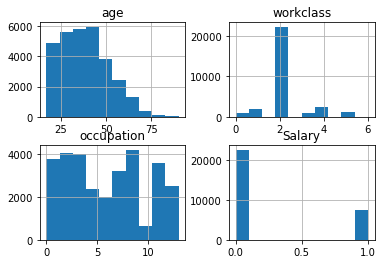

In [11]:
data.hist()

<AxesSubplot:>

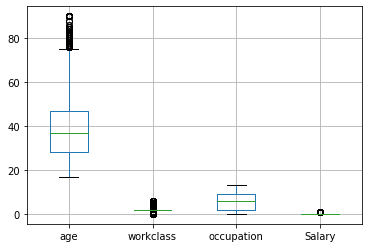

In [12]:
data.boxplot()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         30161 non-null  int64
 1   workclass   30161 non-null  int32
 2   occupation  30161 non-null  int32
 3   Salary      30161 non-null  int32
dtypes: int32(3), int64(1)
memory usage: 589.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

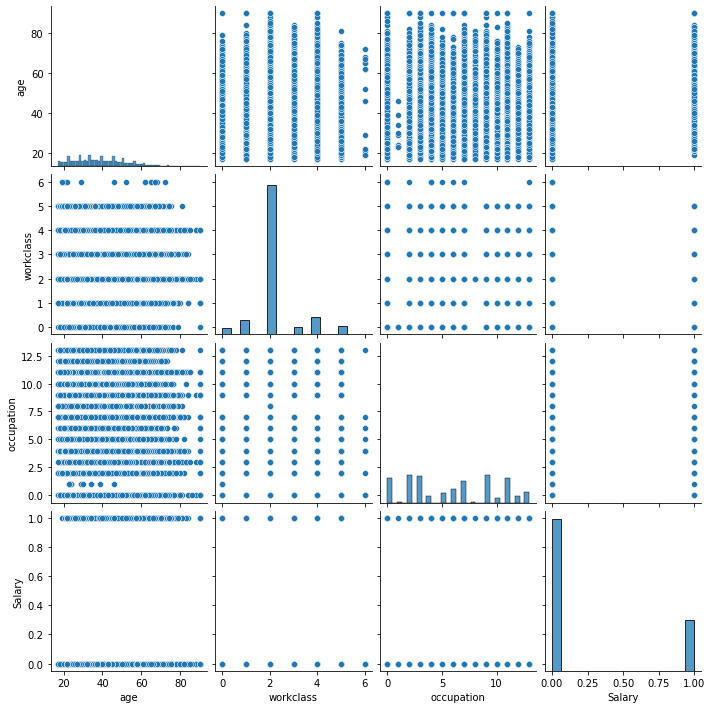

In [14]:
sns.pairplot(data)
plt.show

In [15]:
data.describe()

,age,workclass,occupation,Salary
count,30161.000000,30161.00000,30161.000000,30161.000000
mean,38.438115,2.19933,5.959849,0.248931
std,13.134830,0.95394,4.029633,0.432401
min,17.000000,0.00000,0.000000,0.000000
25%,28.000000,2.00000,2.000000,0.000000
50%,37.000000,2.00000,6.000000,0.000000
75%,47.000000,2.00000,9.000000,0.000000
max,90.000000,6.00000,13.000000,1.000000


In [16]:
array = data.values
X = array[:,0:3]
Y = array[:,3]

In [17]:
X

array([[39,  5,  0],
       [50,  4,  3],
       [38,  2,  5],
       ...,
       [58,  2,  0],
       [22,  2,  0],
       [52,  3,  3]], dtype=int64)

In [18]:
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [20]:
classifer=SVC()

In [21]:
classifer.fit(X_train,y_train)

SVC()

In [22]:
score = classifer.score(X_test,y_test)

In [23]:
score

0.7558846281357056